# <center> Modelling the Kernel Trick  <br> in Support Vector Machines</center>
<center>by: Nicole Woodland, P. Eng. for RoboGarden Inc. </center>

---

In this notebook, watch how an additional feature can be added to the dataset to distinguish features in a higher dimensional space. This method is used to fit a hyperplane to otherwise non-distinguishable class data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

#### First, let's generate some data:

In [59]:
# Generate sample data in a straight line
X = np.array([[-2, 0], [-1, 0], [0, 0], [0, 0.1], [1, 0], [2, 0]])
y = np.array([0, 0, 1, 1, 0, 0]) 
print("This array plots data in essentially a line - we cannot place a single line to break up the two classes:")
print(X)

# Now transform the data by squaring a feature:
# Define the transformation:
def quadratic_transform(X):
    return np.c_[X[:, 0], X[:, 1], X[:, 0]**2]

# Apply the data transformation:
X_transformed = quadratic_transform(X)
print("Now we added the 'third' feature from applying the quadratic function to transform the original feature:")
print(X_transformed)

This array plots data in essentially a line - we cannot place a single line to break up the two classes:
[[-2.   0. ]
 [-1.   0. ]
 [ 0.   0. ]
 [ 0.   0.1]
 [ 1.   0. ]
 [ 2.   0. ]]
Now we added the 'third' feature from applying the quadratic function to transform the original feature:
[[-2.   0.   4. ]
 [-1.   0.   1. ]
 [ 0.   0.   0. ]
 [ 0.   0.1  0. ]
 [ 1.   0.   1. ]
 [ 2.   0.   4. ]]


#### Let's Visualize the data by ploting it in the original data in 2D space compared to the feature plotted in 2D space:

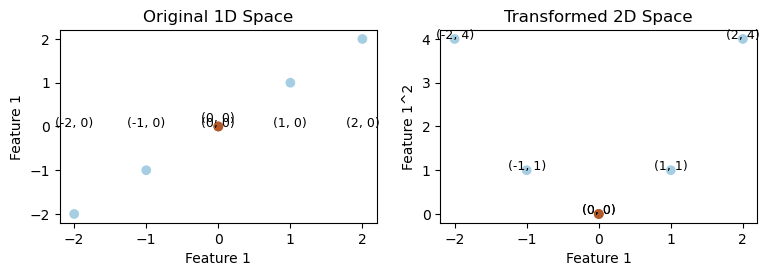

In [82]:
plt.figure(figsize=(9, 2.5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 0], c=y, cmap=plt.cm.Paired)
plt.title("Original 1D Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 1")
# Add labels to the points
for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], f'({X[i, 0]:.0f}, {X[i, 1]:.0f})', ha = "center",fontsize=9,)

# Plot transformed data in 2D space
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 2], c=y, cmap=plt.cm.Paired)
plt.title("Transformed 2D Space")
plt.xlabel("Feature 1")
plt.ylabel("Feature 1^2")
for i in range(len(X)):
    plt.text(X_transformed[i, 0], X_transformed[i, 2], f'({X_transformed[i, 0]:.0f}, {X_transformed[i, 2]:.0f})', ha = "center",fontsize=9,)
plt.show()

#### You can see how now we could find an equation (linear or polynomial) to seperate the data points. To do this, apply the SVC method on the transformed dataset:

In [5]:
# Create an SVC model (you can customize parameters as needed)
model = SVC(kernel='linear', C=1)
model.fit(X_transformed, y)

SVC(C=1, kernel='linear')

#### With the boundary now defined within the model, create a grid to define the bounds of the model and show the boundary in the 2D space:

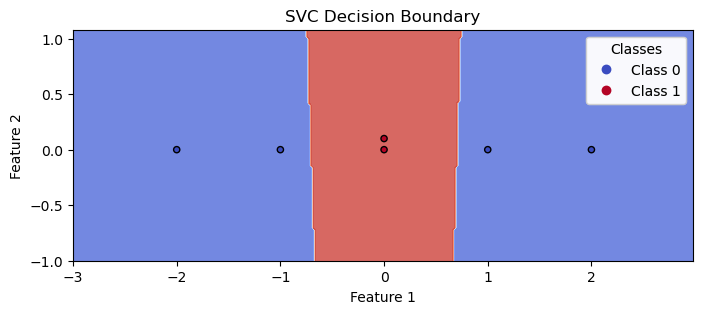

In [6]:
# Create a meshgrid for the plot
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Plot the decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), (xx.ravel())**2])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# Generate indices for the meshgrid
xx, yy = make_meshgrid(X_transformed[:, :2], X_transformed[:, 1:3])

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(8, 3))

# Apply reshaping to allow plotting
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the data points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
legend_labels = ["Class 0", "Class 1"]
legend = ax.legend(scatter.legend_elements()[0], legend_labels, title="Classes")
ax.add_artist(legend)
# Set plot labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('SVC Decision Boundary')
plt.show()

#### The hyperplane can also be shown in 3D space:

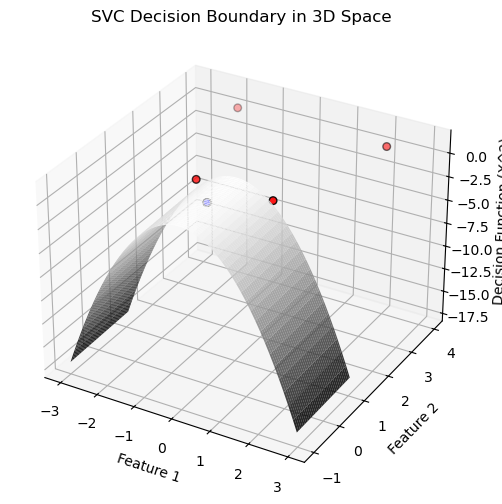

In [7]:
# Plot the decision boundary in 3D space
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the transformed X values
xx, yy = make_meshgrid(X_transformed[:, :2], X_transformed[:, 1:3])
zz = model.decision_function(np.c_[xx.ravel(), yy.ravel(), (xx.ravel())**2])
zz = zz.reshape(xx.shape)

# Plot the decision boundary surface
ax.plot_surface(xx, yy, zz, alpha=0.85, cmap='grey')

# Scatter plot for the data points
ax.scatter(X_transformed[:, 0], X_transformed[:, 2], y, c=['red' if label == 0 else 'blue' for label in y], 
           s=30, edgecolors='black')

# Set plot labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function (X^2)')
ax.set_title('SVC Decision Boundary in 3D Space')

plt.show()